In [428]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import copy

In [429]:
df=pd.read_csv("AdmissionDataset/data.csv")
df
X =df.drop(['Chance of Admit ','Serial No.'],axis=1)
y=df['Chance of Admit ']


*Standardizing consists in subtracting the mean and dividing by the standard deviation.*
*The convention that you standardize predictions primarily exists so that the units of the regression coefficients are the same.*
*when value are largely diffrent one is population and some other attribute is fraction*

In [430]:
X = (X - X.mean())/X.std()#normalize the data(z-mu)/(sigma)
# y=(y-y.mean())/y.std()
#kyuki actual y ke paas pahuchna hai isliye ,jhe y ko normalize karne ka koi reason nahi lag raha

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
my_data=pd.concat([X_train,y_train],axis=1)

In [432]:
X=X_train

In [433]:
ones = np.ones([X.shape[0],1])


In [434]:
X = np.concatenate((ones,X),axis=1)


*values converts it from pandas.core.frame.DataFrame to numpy.ndarray*

In [435]:
y
y=pd.DataFrame(y_train)
y=y.values

*basically assumed m=0 and c=0 for each independent variable intially*

*learning rate needed along with direction*

In [436]:
alpha = 0.01

In [437]:
def meanSquareError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square((y_true - y_pred)))

*no of times we have to iterate to minimize rms*

In [438]:
iters = 10000
lamda=1000
itr=0
lam=[]
error_list=[]
cost=[]

In [439]:
# print(X_train)

In [440]:
lam=[]
error_list=[]
preverror=10000000000000
ans=lamda
flag=0

while lamda>0.000000000000000001:
    y_pred=[]
    lam.append(lamda)
    ridgereg = Ridge(alpha=lamda)
    ridgereg.fit(X_train,y_train)
    lamda=lamda/10
    y_pred = ridgereg.predict(X_test)
    error_list.append((1-r2_score(y_test, y_pred)))
    
    if (1-r2_score(y_test, y_pred)) < preverror:
        ans=lamda*10
        
    preverror=(1-r2_score(y_test, y_pred))

In [441]:
print("ans ",ans)

ans  1.0000000000000002e-13


[1000, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07, 1.0000000000000002e-08, 1.0000000000000003e-09, 1.0000000000000003e-10, 1.0000000000000003e-11, 1.0000000000000002e-12, 1.0000000000000002e-13, 1.0000000000000002e-14, 1e-15, 1.0000000000000001e-16, 1e-17]


Text(0.5, 1.0, 'Lamda vs Error')

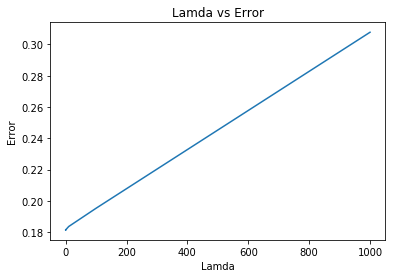

In [442]:
fig, ax = plt.subplots()
print(lam)
ax.plot(lam,error_list)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')

In [443]:
def gradientDescent(X,y,theta,iters,alpha,lamda):
    for i in range(iters):
        theta1=copy.deepcopy(theta)
        theta1[0][0]=0
        theta = theta - (alpha/len(X)) * (np.sum(X * (X @ theta.T - y), axis=0)+(theta1*lamda))
    return theta

In [444]:
iters = 10000
lamda=1000
itr=0
lam=[]
error_list=[]
cost=[]

In [445]:
# print(X)

In [446]:
preverror=10000000000000
ans=lamda
flag=0
while lamda>0.000000000000000001:
    theta = np.zeros([1,8])
    lam.append(lamda)
    g = gradientDescent(X,y,theta,iters,alpha,lamda)
    lamda=lamda/10
    betaList=g[0]
    y_pred1=[]
    ones=np.ones([X_test.shape[0],1])
    X_tr2 = np.concatenate((ones,X_test),axis=1)
    y_pred1=X_tr2@betaList
    error_list.append((1-r2_score(y_test, y_pred1)))    
    if (1-r2_score(y_test, y_pred1)) < preverror:
        ans=lamda*10
    preverror=1-r2_score(y_test, y_pred1)

*Calculated Theta List*

In [447]:
print("ans ",ans)

ans  1.0000000000000002e-13


[1000, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07, 1.0000000000000002e-08, 1.0000000000000003e-09, 1.0000000000000003e-10, 1.0000000000000003e-11, 1.0000000000000002e-12, 1.0000000000000002e-13, 1.0000000000000002e-14, 1e-15, 1.0000000000000001e-16, 1e-17]


Text(0.5, 1.0, 'Lamda vs Error')

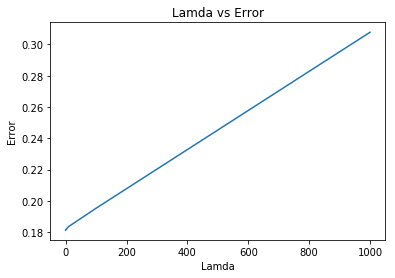

In [448]:
fig, ax = plt.subplots()
print(lam)
ax.plot(lam,error_list)
ax.set_xlabel("Lamda", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Lamda vs Error')

In [449]:
error_list

[0.307814503619543,
 0.19526484907210895,
 0.1835743651426458,
 0.18162832357540504,
 0.18141624527525435,
 0.18139484540060502,
 0.1813927034747811,
 0.18139248926279694,
 0.18139246784140461,
 0.18139246569926337,
 0.18139246548504917,
 0.18139246546362775,
 0.18139246546148569,
 0.18139246546127152,
 0.1813924654612501,
 0.181392465461248,
 0.18139246546124776,
 0.18139246546124776,
 0.18139246546124776,
 0.18139246546124776,
 0.18139246546124776]